https://www.overleaf.com/8958863168dfybphyfvszf

# Task 1: Acquire, preprocess, and analyze the data


### Get dataset

The data has been uploaded to Google Cloud Storage. Deepnotes _seamlessly_ integrates to it.

Example on how to retrieve data
```
!ls /datasets/comp551/project1/
>>> breast_cancer_wisconsin.csv  hepatitis.csv
```

**Note**: You may need to click under _integrations_ then click on connect if it disconnects.

In [ ]:
# imports and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

# dark theme compability
plt.rcParams.update({
    "figure.facecolor":  (1, 1, 1, 1)
})

In [ ]:
# Pre process data

cancer_df = pd.read_csv('/datasets/comp551/project1/breast_cancer_wisconsin.csv')
cancer_df.columns = map(str.lower, cancer_df.columns)
# set id to index
cancer_df.set_index('id', inplace=True)
print("pre cleaning",cancer_df.shape)

# drop any data that are missing
cancer_df = cancer_df[~cancer_df.eq("?").any(1)] 
cancer_df.dropna(axis=0, inplace=True)

# class label
# 2 = benign, map it to 0
# 4 = malignant, map it to 1
cancer_df.loc[cancer_df['class'] == 2, 'class'] = 0
cancer_df.loc[cancer_df['class'] == 4, 'class'] = 1

cancer_df['bare_nuclei'] = cancer_df['bare_nuclei'].astype(int)
# print(cancer_df.dtypes)


# knn needs all values std's because it is subjective to scaling
# nrml_cancer_df = pd.DataFrame()
# for col in cancer_df.columns:
normalized_df=(cancer_df - cancer_df.mean())/cancer_df.std()


print("post cleaning", cancer_df.shape)

cancer_df
# do what you need to do

pre cleaning (699, 10)
post cleaning (683, 10)


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,0
841769,2,1,1,1,2,1,1,1,1,0
888820,5,10,10,3,7,3,8,10,2,1


In [ ]:
# for col in cancer_df.columns:
#     cancer_df[col].value_counts().plot(kind='bar')
#     plt.title(col)
#     plt.ylabel('count')
#     plt.show()

In [ ]:
hepatitis_df = pd.read_csv('/datasets/comp551/project1/hepatitis.csv')
hepatitis_df.columns = map(str.lower, hepatitis_df.columns)
# pre process
print("pre clean", hepatitis_df.shape)
hepatitis_df.replace(to_replace="?", value=np.nan, inplace=True)

del hepatitis_df['protime']
del hepatitis_df['alk_phosphate']
hepatitis_df.dropna(axis=0,inplace=True)

for col in hepatitis_df.columns:
    hepatitis_df[col] = hepatitis_df[col].values.astype(float)
    
# hepatitis_df['protime'].fillna((hepatitis_df['protime'].mean()), inplace=True)
# hepatitis_df['alk_phosphate'].fillna((hepatitis_df['alk_phosphate'].mean()), inplace=True)
# hepatitis_df.dropna(axis=0,inplace=True)

# ALK PHOSPHATE --> fill it with the mean, we tried and it gave lower results
# protime --> fill it with the mean

#23 DIE, 123 LIVE

for col in hepatitis_df.columns:
    if col in ['age', 'bilirubin', 'sgot', 'albumin']:
        # normalizing everything gave higher results in KNN, but did not affect Tree as we expected
        # hepatitis_df[col]=(hepatitis_df[col] - hepatitis_df[col].mean())/hepatitis_df[col].std()
        continue
    hepatitis_df[col] = hepatitis_df[col] - 1

print('post process', hepatitis_df.shape)

hepatitis_df

pre clean (155, 20)
post process (129, 18)


,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology
0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,18.0,4.0,0.0
1,1.0,50.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,42.0,3.5,0.0
2,1.0,78.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,32.0,4.0,0.0
4,1.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,4.0,0.0
5,1.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,28.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,46.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,242.0,3.3,1.0
151,1.0,44.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,142.0,4.3,1.0
152,1.0,61.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,20.0,4.1,1.0
153,1.0,53.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,19.0,4.1,1.0


from description of data, column 19 (protime) is missing 67 values which is 36% of our dataset. we can't afford to discard all of that. either drop that column or replace it by the mean so it doesnt have an impact on training


colum 16, 18 are missing quite a few too.
we can simply drop all those columsn and see the results. we can also train different models

In [ ]:
# for col in hepatitis_df.columns:
#     hepatitis_df[col].value_counts().plot(kind='bar')
#     plt.title(col)
#     plt.show()

# Task 2: Implement the models

## KNN

In [ ]:
# This part just code copied from prof
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
# Other distance types by ourselves
minkowski = lambda x1, x2, p=1.54: np.sum(np.abs(x1 - x2)**p, axis=-1)**(1/p)
cosines = lambda x1, x2: np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
hamming = lambda x1, x2: np.sum((x1 != x2).astype(int), axis=-1)

class KNN:
    
    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        ### MODIFIED ###
        self.x = np.around(x.astype(np.double)).astype(np.int)
        self.y = np.around(y.astype(np.double)).astype(np.int)
        self.C = int(np.max(y) + 1)
        ################
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        ### MODIFIED ###
        x_test = np.around(x_test.astype(np.double)).astype(np.int)
        ################
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns


## Decision Tree

best feature: 1, value 2.0, cost 0.07758620689655173
best feature: 4, value 4.5, cost 0.017241379310344827
best feature: 2, value 1.0, cost 0.02586206896551727
best feature: 1, value 2.0, cost 0.07758620689655173
best feature: 4, value 4.5, cost 0.017241379310344827
best feature: 2, value 1.0, cost 0.02586206896551727
best feature: 2, value 2.0, cost 0.0862068965517241
best feature: 1, value 3.0, cost 0.0
best feature: 1, value 1.0, cost 0.03448275862068964
best feature: 2, value 2.0, cost 0.0862068965517241
best feature: 1, value 3.0, cost 0.0
best feature: 1, value 1.0, cost 0.03448275862068964
best feature: 2, value 2.0, cost 0.08620689655172417
best feature: 0, value 6.0, cost 0.0086206896551724
best feature: 1, value 1.0, cost 0.034482758620689655
best feature: 2, value 2.0, cost 0.08620689655172417
best feature: 0, value 6.0, cost 0.0086206896551724
best feature: 1, value 1.0, cost 0.034482758620689655
best feature: 1, value 2.0, cost 0.09482758620689653
best feature: 4, value 4.

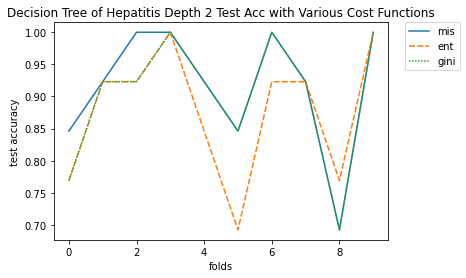

mis     0.915385
ent     0.876923
gini    0.900000
dtype: float64


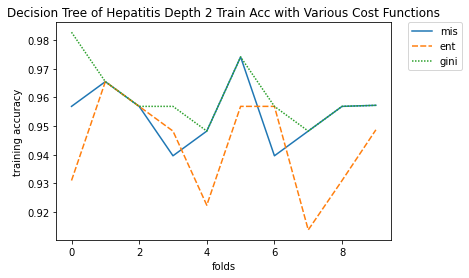

mis     0.954347
ent     0.943148
gini    0.960382
dtype: float64


In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices
        # self.data_indices = np.around(data_indices.astype(np.double)).astype(np.int)                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            ##########################MODIFICATIONS############################
            self.labels = np.around(parent.labels.astype(np.double)).astype(np.int)
            ###################################################################
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


In [ ]:
def greedy_test(node, cost_fn):
        #initialize the best parameter values
        best_cost = np.inf
        best_feature, best_value = None, None
        num_instances, num_features = node.data.shape
        #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
        data_sorted = np.sort(node.data[node.data_indices],axis=0)
        test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
        for f in range(num_features):
            #stores the data corresponding to the f-th feature
            data_f = node.data[node.data_indices, f]
            for test in test_candidates[:,f]:
                #Split the indices using the test value of f-th feature
                left_indices = node.data_indices[data_f <= test]
                right_indices = node.data_indices[data_f > test]
                #we can't have a split where a child has zero element
                #if this is true over all the test features and their test values  then the function returns the best cost as infinity
                if len(left_indices) == 0 or len(right_indices) == 0:                
                    continue
                #compute the left and right cost based on the current split                                                         
                left_cost = cost_fn(node.labels[left_indices])
                right_cost = cost_fn(node.labels[right_indices])
                num_left, num_right = left_indices.shape[0], right_indices.shape[0]
                #get the combined cost using the weighted sum of left and right cost
                cost = (num_left * left_cost + num_right * right_cost)/num_instances
                #update only when a lower cost is encountered
                if cost < best_cost:
                    best_cost = cost
                    best_feature = f
                    best_value = test
        return best_cost, best_feature, best_value

In [ ]:
  #computes misclassification cost by subtracting the maximum probability of any class
  def cost_misclassification(labels):
      ########################MODIFICATIONS############################
      labels = np.around(labels.astype(np.double)).astype(np.int)
      #################################################################
      counts = np.bincount(labels) 
      class_probs = counts / np.sum(counts)
      #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
      return 1 - np.max(class_probs)

  #computes entropy of the labels by computing the class probabilities
  def cost_entropy(labels):
      ########################MODIFICATIONS############################
      labels = np.around(labels.astype(np.double)).astype(np.int)
      #################################################################
      class_probs = np.bincount(labels) / len(labels)
      class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
      return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

  #computes the gini index cost
  def cost_gini_index(labels):
      ########################MODIFICATIONS############################
      labels = np.around(labels.astype(np.double)).astype(np.int)
      #################################################################
      class_probs = np.bincount(labels) / len(labels)
      return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    
  def __init__(self, num_classes=None, max_depth=20, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination

  def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
      ########################MODIFICATIONS############################
          self.num_classes = int(np.max(labels) + 1)
      #################################################################
      #below are initialization of the root of the decision tree
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      #to recursively build the rest of the tree
      self._fit_tree(self.root)
      return self

  def _fit_tree(self, node):
      #This gives the condition for termination of the recursion resulting in a leaf node
      if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
          return
      #greedily select the best test by minimizing the cost
      cost, split_feature, split_value = greedy_test(node, self.cost_fn)
      #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
      if np.isinf(cost):
          return
    #   print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
      #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
      test = node.data[node.data_indices,split_feature] <= split_value
      #store the split feature and value of the node
      node.split_feature = split_feature
      node.split_value = split_value
      #define new nodes which are going to be the left and right child of the present node
      left = Node(node.data_indices[test], node)
      right = Node(node.data_indices[np.logical_not(test)], node)
      #recursive call to the _fit_tree()
      self._fit_tree(left)
      self._fit_tree(right)
      #assign the left and right child to present child
      node.left = left
      node.right = right


  def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if np.float64(x[node.split_feature]) <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs


# Task 3: Run experiments

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score
import statistics 

N_FOLDS = 10


# keep random state to 1 so we can have the same result
X_cancer = cancer_df.loc[:, cancer_df.columns != 'class']
y_cancer = cancer_df['class']
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.30, random_state=1)


X_hepatitis = hepatitis_df.loc[:, hepatitis_df.columns != 'class']
y_hepatitis = hepatitis_df['class']
X_train_hepatitis, X_test_hepatitis, y_train_hepatitis, y_test_hepatitis = train_test_split(X_hepatitis, y_hepatitis, test_size=0.30, random_state=1)

# used for Sklearn KFold
X_cancer_np = X_cancer.to_numpy()
y_cancer_np = y_cancer.to_numpy()
X_hepatitis_np = X_hepatitis.to_numpy()
y_hepatitis_np = y_hepatitis.to_numpy()

In [ ]:
def evaluate_acc(test, pred):
  return np.sum(pred == test)/test.shape[0]

def knn_run(model, X_train, y_train, X_test, y_test):
  y_prob, knns = model.fit(X_train, y_train).predict(X_test)
  #To get hard predictions by choosing the class with the maximum probability
  y_pred = np.argmax(y_prob,axis=-1)
  accuracy = evaluate_acc(y_test, y_pred)
  return accuracy

## Scikit Learn Library Results

In [ ]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(neigh, X_cancer, y_cancer, cv=10, scoring='accuracy')
print('KNN for cancer with {}-Fold: {:.3f}'.format(N_FOLDS, statistics.mean(scores)))

clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_cancer, y_cancer, cv=10, scoring='accuracy')
print('Decision Tree for cancer with {}-Fold: {:.3f}'.format(N_FOLDS, statistics.mean(scores)))

neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, X_hepatitis, y_hepatitis, cv=10, scoring='accuracy')
print('KNN for hepatitis with {}-Fold: {:.3f}'.format(N_FOLDS, statistics.mean(scores)))

clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_hepatitis, y_hepatitis, cv=10, scoring='accuracy')
print('Decision Tree for hepatitis with {}-Fold: {:.3f}'.format(N_FOLDS, statistics.mean(scores)))

KNN for cancer with 10-Fold: 0.968
Decision Tree for cancer with 10-Fold: 0.949
KNN for hepatitis with 10-Fold: 0.782
Decision Tree for hepatitis with 10-Fold: 0.744


## KNN

### Cancer 

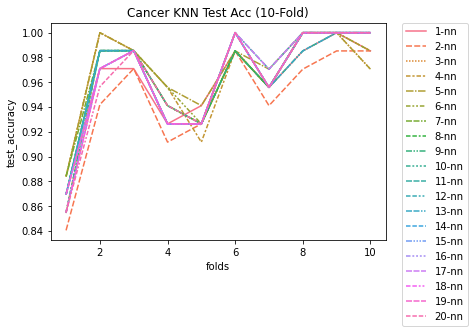

1-nn     0.957651
2-nn     0.945951
3-nn     0.964898
4-nn     0.966368
5-nn     0.969309
6-nn     0.963491
7-nn     0.966390
8-nn     0.964940
9-nn     0.961999
10-nn    0.964962
11-nn    0.966411
12-nn    0.964940
13-nn    0.963470
14-nn    0.963491
15-nn    0.963491
16-nn    0.962042
17-nn    0.964962
18-nn    0.962042
19-nn    0.963491
20-nn    0.962063
dtype: float64


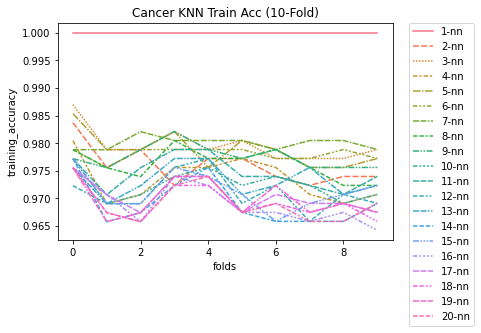

1-nn     1.000000
2-nn     0.975925
3-nn     0.979666
4-nn     0.973483
5-nn     0.978853
6-nn     0.978038
7-nn     0.979990
8-nn     0.976249
9-nn     0.977550
10-nn    0.972507
11-nn    0.974622
12-nn    0.971042
13-nn    0.973320
14-nn    0.969254
15-nn    0.971368
16-nn    0.969091
17-nn    0.970555
18-nn    0.969253
19-nn    0.970066
20-nn    0.969253
dtype: float64
--- 14.662212371826172 seconds ---


In [ ]:
start_time = time.time()

kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_cancer_np)

df_run = pd.DataFrame()
#Modified#
train_acc = pd.DataFrame()
##########
for n in range(1,21):
    tmp = []
    #Modified#
    tmp_1 = []
    ##########
    for train_index, test_index in kf.split(X_cancer_np):
        X_train, X_test = X_cancer_np[train_index], X_cancer_np[test_index]
        y_train, y_test = y_cancer_np[train_index], y_cancer_np[test_index]
        model = KNN(K=n)
        acc = knn_run(model, X_train, y_train, X_test, y_test)
        #Modified#
        acc_train = knn_run(model, X_train, y_train, X_train, y_train)
        ##########
        tmp.append(acc)
        #Modified#
        tmp_1.append(acc_train)
        ##########
    df_run['{}-nn'.format(n)] = tmp
    #Modified#
    train_acc['{}-nn'.format(n)] = tmp_1
    ##########

df_run.reset_index(drop=True, inplace=True)
df_run.index += 1 


fig = plt.figure()
sns.lineplot(data=df_run)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('folds')
plt.ylabel('test_accuracy')
plt.title('Cancer KNN Test Acc ({}-Fold)'.format(N_FOLDS))
plt.show()
fig.savefig('plots/cancer-knn-test.png', bbox_inches='tight')
print(df_run.mean())

#Modified#
fig2 = plt.figure()
sns.lineplot(data=train_acc)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('folds')
plt.ylabel('training_accuracy')
plt.title('Cancer KNN Train Acc ({}-Fold)'.format(N_FOLDS))
plt.show()
fig2.savefig('plots/cancer-knn_training.png', bbox_inches='tight')
print(train_acc.mean())
##########

print("--- %s seconds ---" % (time.time() - start_time))

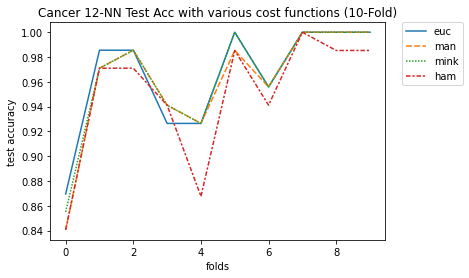

euc     0.964940
man     0.960592
mink    0.963512
ham     0.948849
dtype: float64


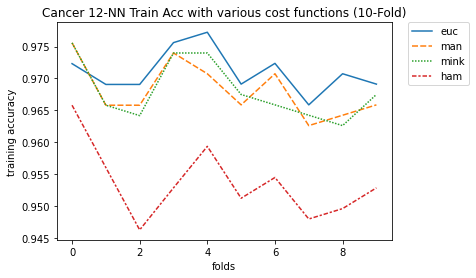

euc     0.971042
man     0.968115
mink    0.968115
ham     0.953637
dtype: float64


In [ ]:
n_neigh = 12

kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_cancer_np)

df_run = pd.DataFrame()
#Modified#
train_acc = pd.DataFrame()
##########
for f, name in zip([euclidean, manhattan, minkowski, hamming], ['euc', 'man', 'mink', 'ham']):
    tmp = []
    #Modified#
    tmp_1 = []
    ##########
    for train_index, test_index in kf.split(X_cancer_np):
        X_train, X_test = X_cancer_np[train_index], X_cancer_np[test_index]
        y_train, y_test = y_cancer_np[train_index], y_cancer_np[test_index]
        model = KNN(K=n_neigh, dist_fn=f)
        acc = knn_run(model, X_train, y_train, X_test, y_test)
        #Modified#
        acc_train = knn_run(model, X_train, y_train, X_train, y_train)
        ##########
        tmp.append(acc)
        #Modified#
        tmp_1.append(acc_train)
        ##########
        
    df_run[name] = tmp
    #Modified#
    train_acc[name] = tmp_1
    ##########

fig = plt.figure()
sns.lineplot(data=df_run)
plt.xlabel('folds')
plt.ylabel('test accuracy')
plt.title('Cancer 12-NN Test Acc with various cost functions ({}-Fold)'.format(N_FOLDS, n_neigh))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('plots/cancer-12nn-functions-test.png', bbox_inches='tight')
print(df_run.mean())

#Modified#
fig2 = plt.figure()
sns.lineplot(data=train_acc)
plt.xlabel('folds')
plt.ylabel('training accuracy')
plt.title('Cancer 12-NN Train Acc with various cost functions ({}-Fold)'.format(N_FOLDS, n_neigh))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig2.savefig('plots/cancer-12nn-functions-train.png', bbox_inches='tight')
print(train_acc.mean())
##########

### Hepatitis

### First figure out the best K

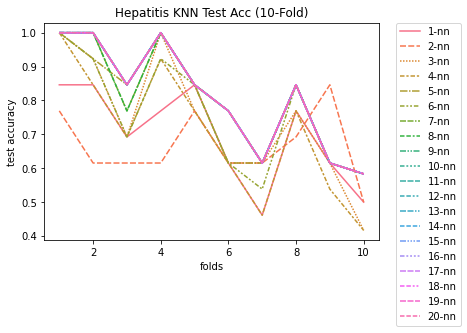

1-nn     0.696154
2-nn     0.665385
3-nn     0.741667
4-nn     0.703205
5-nn     0.789103
6-nn     0.758333
7-nn     0.804487
8-nn     0.804487
9-nn     0.812179
10-nn    0.812179
11-nn    0.812179
12-nn    0.812179
13-nn    0.812179
14-nn    0.812179
15-nn    0.812179
16-nn    0.812179
17-nn    0.812179
18-nn    0.812179
19-nn    0.812179
20-nn    0.812179
dtype: float64


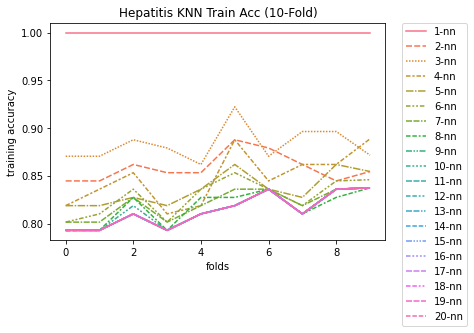

1-nn     1.000000
2-nn     0.858746
3-nn     0.882869
4-nn     0.848372
5-nn     0.836332
6-nn     0.828581
7-nn     0.821692
8-nn     0.817381
9-nn     0.813933
10-nn    0.814795
11-nn    0.813933
12-nn    0.813933
13-nn    0.813933
14-nn    0.813933
15-nn    0.813933
16-nn    0.813933
17-nn    0.813933
18-nn    0.813933
19-nn    0.813933
20-nn    0.813933
dtype: float64


In [ ]:
kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_hepatitis_np)

df_run = pd.DataFrame()
#Modified#
train_acc = pd.DataFrame()
##########
for n in range(1,21):
    tmp = []
    #Modified#
    tmp_1 = []
    ##########
    for train_index, test_index in kf.split(X_hepatitis_np):
        X_train, X_test = X_hepatitis_np[train_index], X_hepatitis_np[test_index]
        y_train, y_test = y_hepatitis_np[train_index], y_hepatitis_np[test_index]
        model = KNN(K=n)
        acc = knn_run(model, X_train, y_train, X_test, y_test)
        #Modified#
        acc_train = knn_run(model, X_train, y_train, X_train, y_train)
        ##########
        tmp.append(acc)
        #Modified#
        tmp_1.append(acc_train)
        ##########
    df_run['{}-nn'.format(n)] = tmp
    #Modified#
    train_acc['{}-nn'.format(n)] = tmp_1
    ##########

df_run.reset_index(drop=True, inplace=True)
df_run.index += 1 

fig = plt.figure()
sns.lineplot(data=df_run)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('folds')
plt.ylabel('test accuracy')
plt.title('Hepatitis KNN Test Acc ({}-Fold)'.format(N_FOLDS))
plt.show()
fig.savefig('plots/hepatitis-knn-test.png', bbox_inches='tight')
print(df_run.mean())

#Modified#
fig2 = plt.figure()
sns.lineplot(data=train_acc)
plt.xlabel('folds')
plt.ylabel('training accuracy')
plt.title('Hepatitis KNN Train Acc ({}-Fold)'.format(N_FOLDS))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig2.savefig('plots/Hepatitis-knn-functions-train.png', bbox_inches='tight')
print(train_acc.mean())
##########

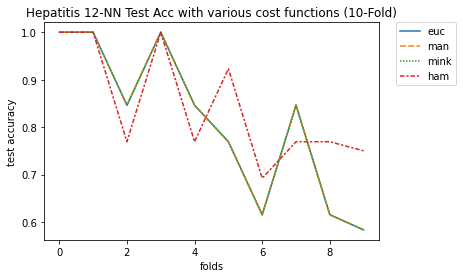

euc     0.812179
man     0.812179
mink    0.812179
ham     0.844231
dtype: float64


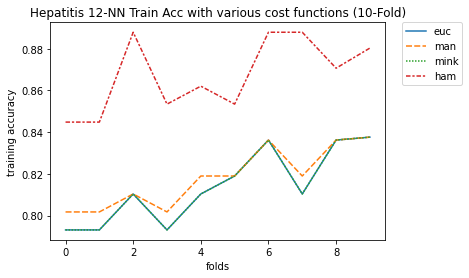

euc     0.813933
man     0.818243
mink    0.813933
ham     0.867345
dtype: float64


In [ ]:
n_neigh = 12

kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_hepatitis_np)

df_run = pd.DataFrame()
#Modified#
train_acc = pd.DataFrame()
##########
for f, name in zip([euclidean, manhattan, minkowski, hamming],['euc', 'man', 'mink', 'ham']):
    tmp = []
    #Modified#
    tmp_1 = []
    ##########
    for train_index, test_index in kf.split(X_hepatitis_np):
        X_train, X_test = X_hepatitis_np[train_index], X_hepatitis_np[test_index]
        y_train, y_test = y_hepatitis_np[train_index], y_hepatitis_np[test_index]
        model = KNN(K=n_neigh, dist_fn=f)
        acc = knn_run(model, X_train, y_train, X_test, y_test)
        #Modified#
        acc_train = knn_run(model, X_train, y_train, X_train, y_train)
        ##########
        tmp.append(acc)
        #Modified#
        tmp_1.append(acc_train)
        ##########
    df_run[name] = tmp
    #Modified#
    train_acc[name] = tmp_1
    ##########

fig = plt.figure()
sns.lineplot(data=df_run)
plt.xlabel('folds')
plt.ylabel('test accuracy')
plt.title('Hepatitis 12-NN Test Acc with various cost functions ({}-Fold)'.format(N_FOLDS, n_neigh))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('plots/hepatitis-4nn-functions-test.png', bbox_inches='tight')
print(df_run.mean())

#Modified#
fig2 = plt.figure()
sns.lineplot(data=train_acc)
plt.xlabel('folds')
plt.ylabel('training accuracy')
plt.title('Hepatitis 12-NN Train Acc with various cost functions ({}-Fold)'.format(N_FOLDS, n_neigh))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig2.savefig('plots/hepatitis-4nn-functions-train.png', bbox_inches='tight')
print(train_acc.mean())
##########


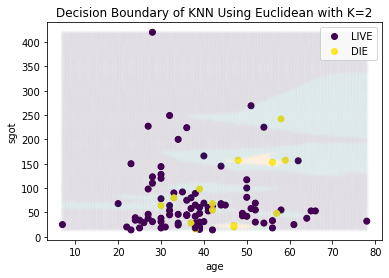

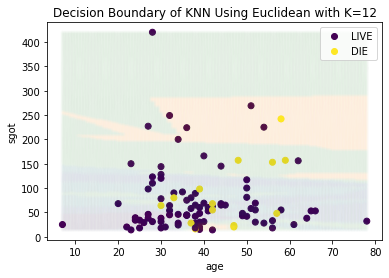

In [ ]:
x = X_hepatitis_np[:, 0::14]
y = y_hepatitis_np

(num_instances, num_features), num_classes = x.shape, np.max(y)+1

x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)

x_all = np.vstack((x0.ravel(),x1.ravel())).T


model = KNN(K=2, dist_fn= euclidean)

y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1
y_prob_all, knns = model.fit(x_train, y_train).predict(x_all)


fig = plt.figure()
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', label = 'live', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=0.01)



plt.legend(handles=scatter.legend_elements()[0], labels=['LIVE', 'DIE'])
plt.ylabel('sgot')
plt.xlabel('age')
plt.title('Decision Boundary of KNN Using Euclidean with K=2')
plt.show()
fig.savefig('plots/hepatitis-decision-boundaries.png', bbox_inches='tight')
###################################################################################################
model = KNN(K=12, dist_fn=euclidean)

y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1
y_prob_all, knns = model.fit(x_train, y_train).predict(x_all)


fig = plt.figure()
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', label = 'live', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=0.01)



plt.legend(handles=scatter.legend_elements()[0], labels=['LIVE', 'DIE'])
plt.ylabel('sgot')
plt.xlabel('age')
plt.title('Decision Boundary of KNN Using Euclidean with K=12')
plt.show()
fig.savefig('plots/hepatitis-decision-boundaries.png', bbox_inches='tight')

## Decision Tree

### Cancer


In [ ]:
start_time = time.time()

kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_cancer_np)

df_run = pd.DataFrame()
for depth in range(1,21):
    tmp = []
    for train_index, test_index in kf.split(X_cancer_np):
        X_train, X_test = X_cancer_np[train_index], X_cancer_np[test_index]
        y_train, y_test = y_cancer_np[train_index], y_cancer_np[test_index]
        dt = DecisionTree(max_depth=depth)
        probs_test = dt.fit(X_train, y_train).predict(X_test)
        y_pred = np.argmax(probs_test,1)
        acc = evaluate_acc(y_test, y_pred)
        tmp.append(acc)
    df_run['depth_{}'.format(depth)] = tmp


df_run.reset_index(drop=True, inplace=True)
df_run.index += 1 


fig = plt.figure()
sns.lineplot(data=df_run)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('folds')
plt.ylabel('accuracy')
plt.title('Cancer Decision tree ({}-Fold)'.format(N_FOLDS))
plt.show()
fig.savefig('plots/cancer-dt.png', bbox_inches='tight')
df_run.mean()

# print("--- %s seconds ---" % (time.time() - start_time))

KeyboardInterrupt: 

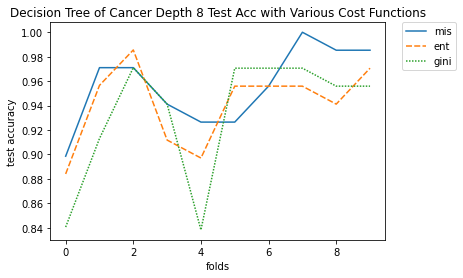

mis     0.956117
ent     0.941432
gini    0.932758
dtype: float64


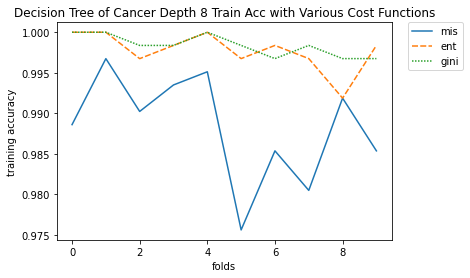

mis     0.988289
ent     0.997723
gini    0.998374
dtype: float64


In [ ]:
depth = 8
N_FOLDS = 10
kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_cancer_np)

df_run = pd.DataFrame()
#Modified#
train_acc = pd.DataFrame()
##########
for f, name in zip([cost_misclassification, cost_entropy, cost_gini_index], ['mis', 'ent', 'gini']):
    tmp = []
    #Modified#
    tmp_1 = []
    ##########
    for train_index, test_index in kf.split(X_cancer_np):
        X_train, X_test = X_cancer_np[train_index], X_cancer_np[test_index]
        y_train, y_test = y_cancer_np[train_index], y_cancer_np[test_index]
        model = DecisionTree(max_depth=depth, cost_fn=f)
        probs_test = model.fit(X_train, y_train).predict(X_test)
        y_pred = np.argmax(probs_test,1)
        acc = evaluate_acc(y_test, y_pred)
        #Modified#
        probs_test = model.fit(X_train, y_train).predict(X_train)
        y_pred = np.argmax(probs_test,1)
        acc_train = evaluate_acc(y_train, y_pred)
        ##########
        tmp.append(acc)
        #Modified#
        tmp_1.append(acc_train)
        ##########
        
    df_run[name] = tmp
    #Modified#
    train_acc[name] = tmp_1
    ##########

fig = plt.figure()
sns.lineplot(data=df_run)
plt.xlabel('folds')
plt.ylabel('test accuracy')
plt.title('Decision Tree of Cancer Depth 8 Test Acc with Various Cost Functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('plots/cancer-12nn-functions-test.png', bbox_inches='tight')
print(df_run.mean())

#Modified#
fig2 = plt.figure()
sns.lineplot(data=train_acc)
plt.xlabel('folds')
plt.ylabel('training accuracy')
plt.title('Decision Tree of Cancer Depth 8 Train Acc with Various Cost Functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig2.savefig('plots/cancer-12nn-functions-train.png', bbox_inches='tight')
print(train_acc.mean())
##########

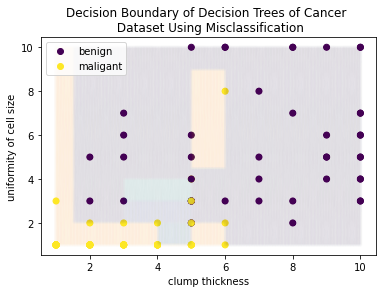

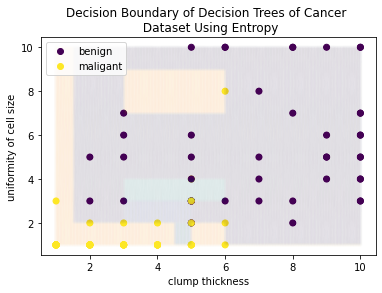

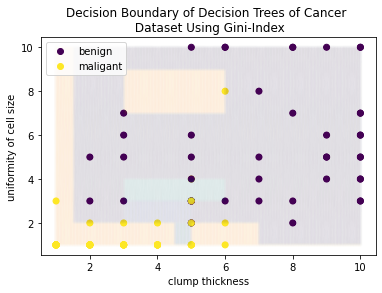

In [ ]:
x = X_cancer_np[:, 0:2]
y = y_cancer_np

(num_instances, num_features), num_classes = x.shape, np.max(y)+1

x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]),200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)

x_all = np.vstack((x0.ravel(),x1.ravel())).T


model = DecisionTree(max_depth=10, cost_fn = cost_misclassification)
y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1


y_prob_all = model.fit(x_train, y_train).predict(x_all)

fig = plt.figure()
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=.01)
plt.legend(handles=scatter.legend_elements()[0], labels=['benign', 'maligant'])
plt.ylabel('uniformity of cell size')
plt.xlabel('clump thickness')
plt.title('Decision Boundary of Decision Trees of Cancer \n Dataset Using Misclassification')
plt.show()
fig.savefig('plots/cancer-decision-boundaries.png', bbox_inches='tight')

############################################################################################
model = DecisionTree(max_depth=10, cost_fn = cost_entropy)
y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1


y_prob_all = model.fit(x_train, y_train).predict(x_all)

fig = plt.figure()
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=.01)
plt.legend(handles=scatter.legend_elements()[0], labels=['benign', 'maligant'])
plt.ylabel('uniformity of cell size')
plt.xlabel('clump thickness')
plt.title('Decision Boundary of Decision Trees of Cancer \n Dataset Using Entropy')
plt.show()
fig.savefig('plots/cancer-decision-boundaries.png', bbox_inches='tight')
############################################################################################
model = DecisionTree(max_depth=10, cost_fn = cost_gini_index)
y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1


y_prob_all = model.fit(x_train, y_train).predict(x_all)

fig = plt.figure()
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=.01)
plt.legend(handles=scatter.legend_elements()[0], labels=['benign', 'maligant'])
plt.ylabel('uniformity of cell size')
plt.xlabel('clump thickness')
plt.title('Decision Boundary of Decision Trees of Cancer \n Dataset Using Gini-Index')
plt.show()
fig.savefig('plots/cancer-decision-boundaries.png', bbox_inches='tight')



### Hepatitis


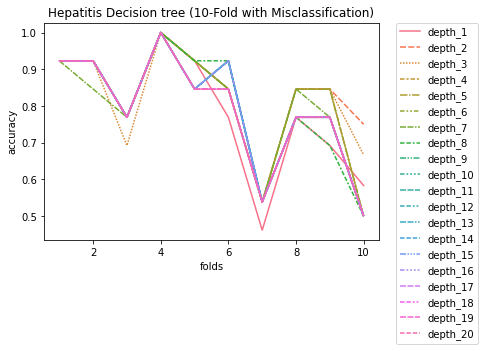

depth_1     0.781410
depth_2     0.836538
depth_3     0.820513
depth_4     0.811538
depth_5     0.811538
depth_6     0.811538
depth_7     0.796154
depth_8     0.796154
depth_9     0.796154
depth_10    0.796154
depth_11    0.796154
depth_12    0.796154
depth_13    0.796154
depth_14    0.796154
depth_15    0.796154
depth_16    0.796154
depth_17    0.788462
depth_18    0.788462
depth_19    0.788462
depth_20    0.788462
dtype: float64

In [ ]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_hepatitis_np)

df_run = pd.DataFrame()
for depth in range(1,21):
    tmp = []
    for train_index, test_index in kf.split(X_hepatitis_np):
        X_train, X_test = X_hepatitis_np[train_index], X_hepatitis_np[test_index]
        y_train, y_test = y_hepatitis_np[train_index], y_hepatitis_np[test_index]
        dt = DecisionTree(max_depth=depth)
        probs_test = dt.fit(X_train, y_train).predict(X_test)
        y_pred = np.argmax(probs_test,1)
        acc = evaluate_acc(y_test, y_pred)
        tmp.append(acc)
    df_run['depth_{}'.format(depth)] = tmp

df_run.reset_index(drop=True, inplace=True)
df_run.index += 1 


fig = plt.figure()
sns.lineplot(data=df_run)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('folds')
plt.ylabel('accuracy')
plt.title('Hepatitis Decision tree ({}-Fold with Misclassification)'.format(N_FOLDS))
plt.show()
fig.savefig('plots/hepatitis-dt.png', bbox_inches='tight')
df_run.mean()


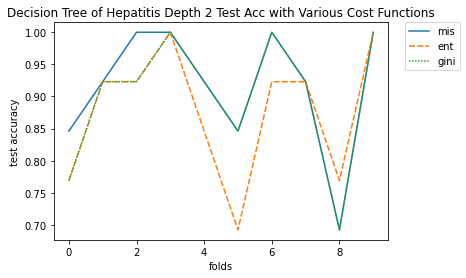

mis     0.915385
ent     0.876923
gini    0.900000
dtype: float64


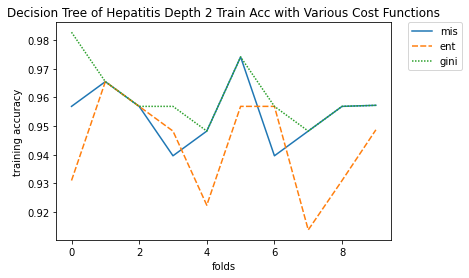

mis     0.954347
ent     0.943148
gini    0.960382
dtype: float64


In [ ]:
depth = 2
N_FOLDS = 10
kf = KFold(n_splits=N_FOLDS)
kf.get_n_splits(X_hepatitis_np)

df_run = pd.DataFrame()
#Modified#
train_acc = pd.DataFrame()
##########
for f, name in zip([cost_misclassification, cost_entropy, cost_gini_index], ['mis', 'ent', 'gini']):
    tmp = []
    #Modified#
    tmp_1 = []
    ##########
    for train_index, test_index in kf.split(X_hepatitis_np):
        X_train, X_test = X_cancer_np[train_index], X_cancer_np[test_index]
        y_train, y_test = y_cancer_np[train_index], y_cancer_np[test_index]
        model = DecisionTree(max_depth=depth, cost_fn=f)
        probs_test = model.fit(X_train, y_train).predict(X_test)
        y_pred = np.argmax(probs_test,1)
        acc = evaluate_acc(y_test, y_pred)
        #Modified#
        probs_test = model.fit(X_train, y_train).predict(X_train)
        y_pred = np.argmax(probs_test,1)
        acc_train = evaluate_acc(y_train, y_pred)
        ##########
        tmp.append(acc)
        #Modified#
        tmp_1.append(acc_train)
        ##########
        
    df_run[name] = tmp
    #Modified#
    train_acc[name] = tmp_1
    ##########

fig = plt.figure()
sns.lineplot(data=df_run)
plt.xlabel('folds')
plt.ylabel('test accuracy')
plt.title('Decision Tree of Hepatitis Depth 2 Test Acc with Various Cost Functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('plots/cancer-12nn-functions-test.png', bbox_inches='tight')
print(df_run.mean())

#Modified#
fig2 = plt.figure()
sns.lineplot(data=train_acc)
plt.xlabel('folds')
plt.ylabel('training accuracy')
plt.title('Decision Tree of Hepatitis Depth 2 Train Acc with Various Cost Functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig2.savefig('plots/cancer-12nn-functions-train.png', bbox_inches='tight')
print(train_acc.mean())
##########

In [ ]:
x = X_hepatitis_np[:, 0::14]
y = y_hepatitis_np

# x = X_hepatitis_np
# y = y_hepatitis_np

(num_instances, num_features), num_classes = x.shape, np.max(y)+1

x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]


x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)

x_all = np.vstack((x0.ravel(),x1.ravel())).T


model = DecisionTree(max_depth=2, cost_fn=cost_misclassification)

y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)

fig = plt.figure()
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', label = 'live', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=0.01)


plt.legend(handles=scatter.legend_elements()[0], labels=['LIVE', 'DIE'])
plt.ylabel('sgot')
plt.xlabel('age')
plt.title('Decision Boundary of Sgot over Age of Hepatitis \n with Misclassification and Max Depth 2')
plt.show()
fig.savefig('plots/hepatitis-decision-boundaries.png', bbox_inches='tight')
# ###################################################################################################
# model = DecisionTree(max_depth=20, cost_fn=cost_misclassification)

# y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
# y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1
# y_prob_all = model.fit(x_train, y_train).predict(x_all)

# fig = plt.figure()
# scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', label = 'live', alpha=1)
# plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=0.01)


# plt.legend(handles=scatter.legend_elements()[0], labels=['LIVE', 'DIE'])
# plt.ylabel('sgot')
# plt.xlabel('age')
# plt.title('Decision Boundary of Sgot over Age of Hepatitis \n with Misclassification and Max Depth 20')
# plt.show()
# fig.savefig('plots/hepatitis-decision-boundaries.png', bbox_inches='tight')

NameError: name 'X_hepatitis_np' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63b0ca76-97b4-414e-8892-f9a0040b5018' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>